# Step 1 (Importing Libraries and Data)

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
credit_df = pd.read_csv("credit-card-data.csv")
df = credit_df.copy()
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step 2: EDA

In [194]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [195]:
print(credit_df.shape)

(8950, 18)


### We can see that attributes CREDIT_LIMIT and MINIMUM_PAYMENTS are missing values. Lets look at same.

In [196]:
print(credit_df.isna().sum()) # To Check the no. of unavailable instances.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### Let's first check out the distribution of CREDIT_LIMIT and MINIMUM_PAYMENTS to get an idea which method to use for filling null values.

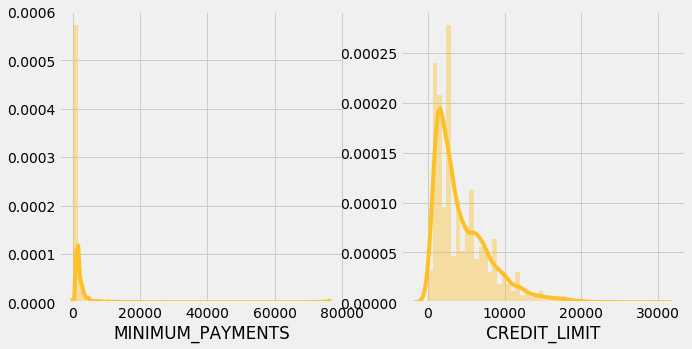

In [197]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(credit_df.MINIMUM_PAYMENTS.dropna(), color='#fdc029')
plt.subplot(1,2,2)
sns.distplot(credit_df.CREDIT_LIMIT.dropna(), color='#fdc029')
plt.show()

### We can see that distribution is skewed so we will use Median to fill these values.

In [198]:
credit_df['MINIMUM_PAYMENTS'].fillna(credit_df['MINIMUM_PAYMENTS'].mean(), inplace=True)
credit_df['CREDIT_LIMIT'].fillna(credit_df['CREDIT_LIMIT'].mean(), inplace=True)

print(credit_df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].isna().sum())

MINIMUM_PAYMENTS    0
CREDIT_LIMIT        0
dtype: int64


##### Now we are set with missing Values.

In [199]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


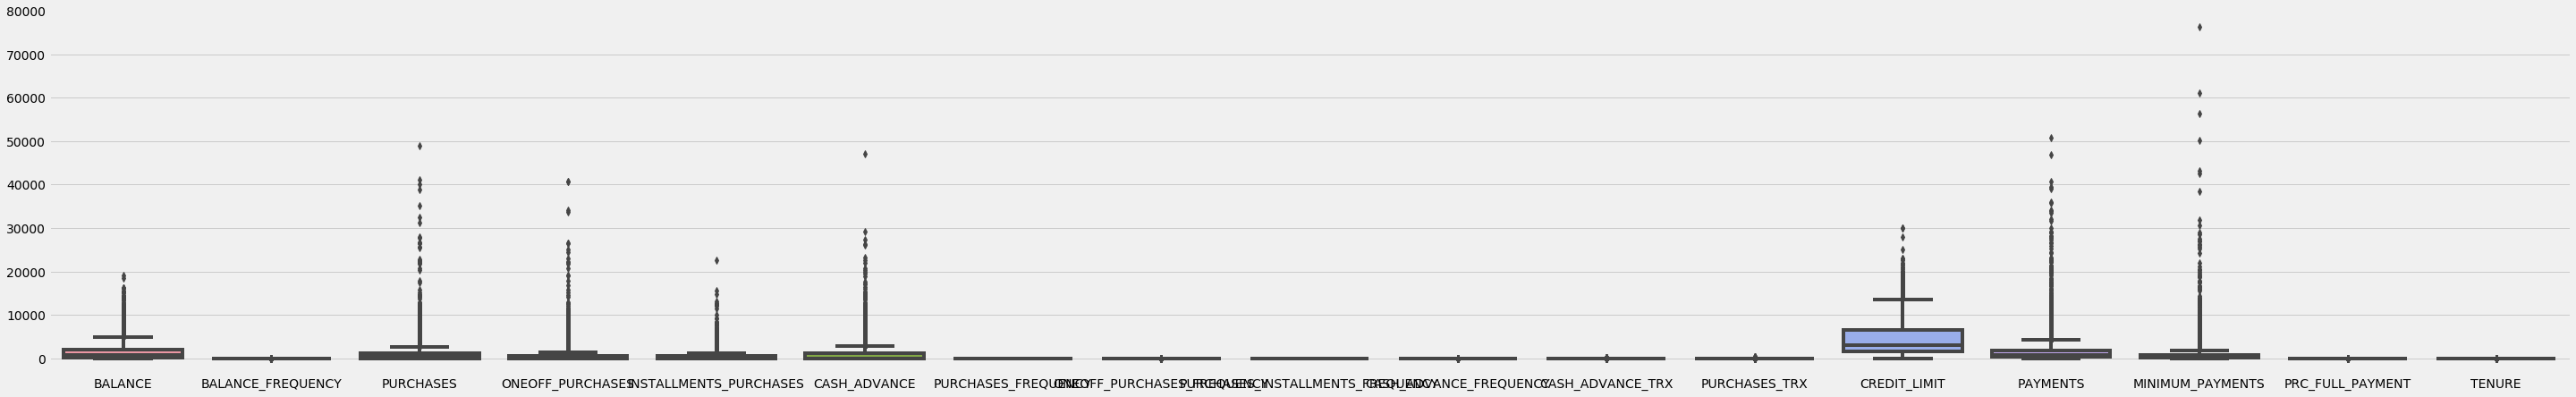

In [200]:
plt.figure(figsize=(45,7))
sns.boxplot(data=credit_df)
plt.show()

#### When we observe the boxplot we find the presence of many outliers but it's better not to handle outliers because we want to analyse all types of customers so better not to handle them.

In [201]:
credit_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### Let's derive some KPI's
     1)  Monthly average purchase->(month_avg_purchase)-> PURCHASE/(PURCHASE_FREQUENCY*TENURE)
     2)  Cash advance amount->(cash_advance_amt)-> CASH_ADVANCE/(PURCHASE_FREQUENCY*TENURE)

In [202]:
credit_df['month_avg_purchase'] = credit_df['PURCHASES']/(credit_df['TENURE'])
credit_df['cash_advance_amt'] = credit_df['CASH_ADVANCE']/(credit_df['TENURE'])
credit_df[['month_avg_purchase','cash_advance_amt']].head()


,month_avg_purchase,cash_advance_amt
0,7.950000,0.000000
1,0.000000,536.912124
2,64.430833,0.000000
3,124.916667,17.149001
4,1.333333,0.000000


###### 3) Purchase_type
    In data there are two type of purchases i.e oneoff_purchase and installments_purchase. We will check if there is any relation between these two fields. 

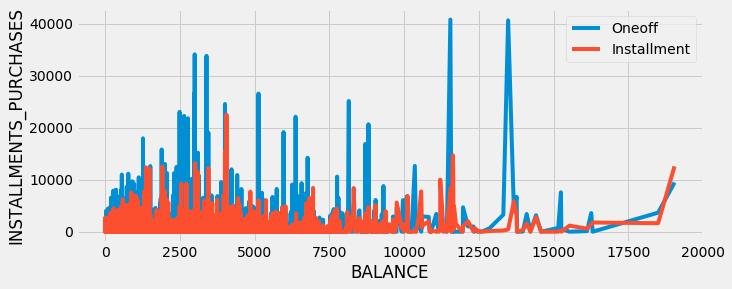

In [203]:
plt.figure(figsize=(10,4))
sns.lineplot(credit_df['BALANCE'],credit_df['ONEOFF_PURCHASES'],label='Oneoff')
sns.lineplot(credit_df['BALANCE'],credit_df['INSTALLMENTS_PURCHASES'],label="Installment")
plt.show()

In [204]:
print(credit_df[(credit_df['ONEOFF_PURCHASES'] == 0) & (credit_df['INSTALLMENTS_PURCHASES']==0)].shape)
print(credit_df[(credit_df['ONEOFF_PURCHASES']==0) & (credit_df['INSTALLMENTS_PURCHASES']>0)].shape)
print(credit_df[(credit_df['ONEOFF_PURCHASES']>0) & (credit_df['INSTALLMENTS_PURCHASES']==0)].shape)
print(credit_df[(credit_df['ONEOFF_PURCHASES']>0) & (credit_df['INSTALLMENTS_PURCHASES']>0)].shape)

(2042, 20)
(2260, 20)
(1874, 20)
(2774, 20)


###### When we add all these rows we get is 8950 i.e total no. of rows so we can infer following things:
        1) Customer prefering One-Off Purchases.
        2) Customer prefering Installments Purchases.
        3) Customers preferring both.
        4) Customers preferring none.

In [205]:
def purchase_by_type(credit_df):
    if (credit_df['ONEOFF_PURCHASES']==0) & (credit_df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit_df['ONEOFF_PURCHASES']>0) & (credit_df['INSTALLMENTS_PURCHASES']>0):
         return 'dual'
    if (credit_df['ONEOFF_PURCHASES']>0) & (credit_df['INSTALLMENTS_PURCHASES']==0):
        return 'oneoff'
    if (credit_df['ONEOFF_PURCHASES']==0) & (credit_df['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

credit_df['purchase_by_type'] = credit_df.apply(purchase_by_type,axis=1)
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,month_avg_purchase,cash_advance_amt,purchase_by_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,oneoff
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff


In [206]:
credit_df['limit_usage'] = credit_df['BALANCE']/credit_df['CREDIT_LIMIT']
credit_df['minimum_payment'] = credit_df['PAYMENTS']/credit_df['MINIMUM_PAYMENTS']
credit_df[['limit_usage','minimum_payment']].head()

,limit_usage,minimum_payment
0,0.040901,1.446508
1,0.457495,3.826241
2,0.332687,0.991682
3,0.222223,0.000000
4,0.681429,2.771075


In [207]:
credit_df.drop(['CUST_ID'],axis=1,inplace=True)

### As we need to define marketing strategy, let's think how a bank will get  benefits. I believe a bank makes money from roping people in for longer amounts of time as well as making purchases. I think purchases, balance, and payments are the best play because they exemplify the baseline services of a bank (getting people to have more with the bank, pay them more, and spend more overall to have to pay back) without those key problems.

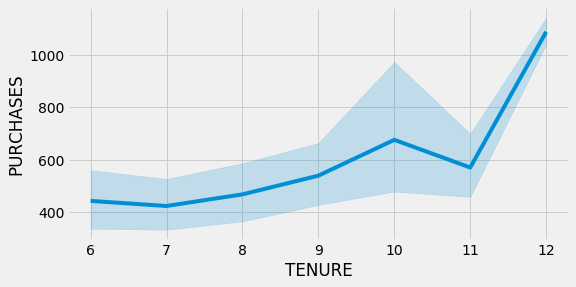

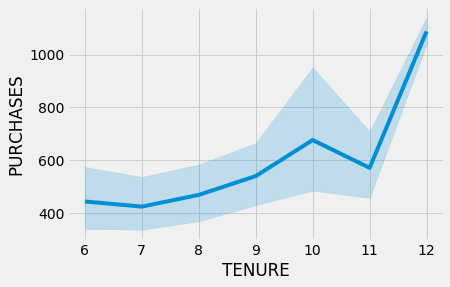

In [208]:
def scatter_tenure(field):
    plt.figure(figsize=(8,4))
    sns.lineplot(x='TENURE',y=field,data=credit_df)
    plt.show()
scatter_tenure('PURCHASES')
sns.lineplot(x='TENURE',y='PURCHASES',data=credit_df)

##### We can see that as tenure increases the purchase amount also increases.

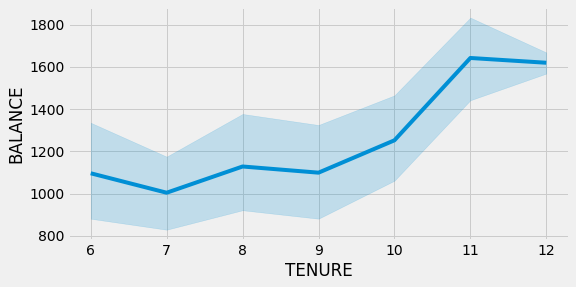

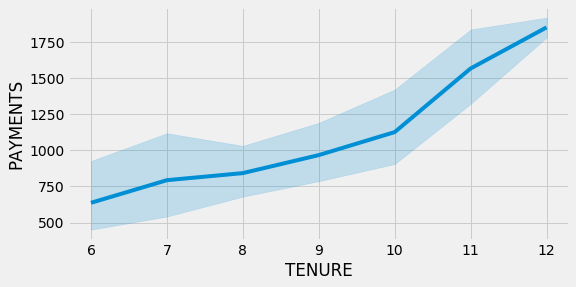

In [209]:
scatter_tenure('BALANCE')
scatter_tenure('PAYMENTS')

##### Same phenomena is observed here.

In [210]:
ratio = credit_df.groupby('purchase_by_type').apply(lambda x: np.mean(x['minimum_payment']))
ratio.values

array([ 7.23117631, 13.24507411, 10.07670114,  5.49813638])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  


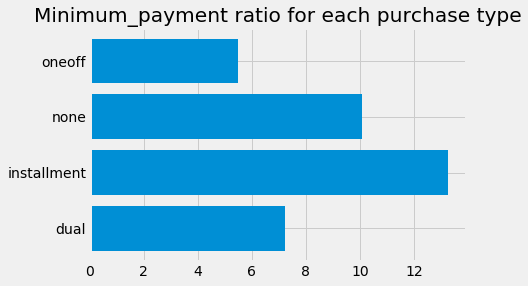

In [211]:
fig,ax=plt.subplots()
ax.barh(bottom=range(len(ratio)),width=ratio.values)
ax.set(yticks=np.arange(len(ratio)),yticklabels=ratio.index)
plt.title("Minimum_payment ratio for each purchase type")
plt.show()

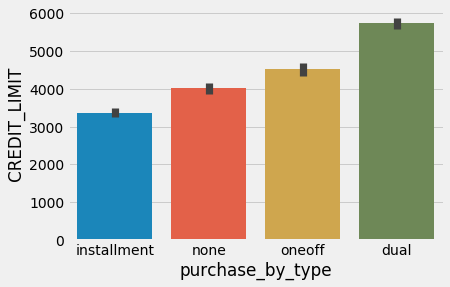

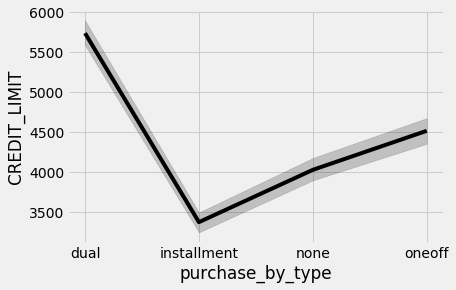

In [212]:
sns.barplot(y='CREDIT_LIMIT',x='purchase_by_type',data=credit_df)
plt.show()
sns.lineplot(y='CREDIT_LIMIT',x='purchase_by_type',data=credit_df,color='black')
plt.show()

##### Customers who do installment purchases have good credit scores.

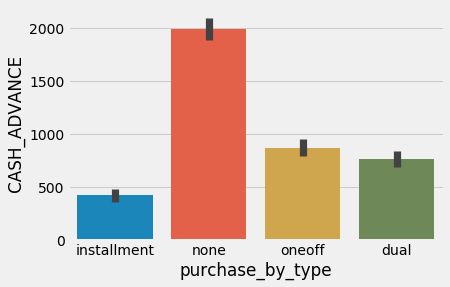

In [213]:
sns.barplot(x='purchase_by_type',y='CASH_ADVANCE',data=credit_df)
plt.show()

##### Customers who don't dealt with either  installment or oneoff purchases generally takes more cash in advance.

## 3 Step (Transformation)

In [214]:
credit_df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
month_avg_purchase                  float64
cash_advance_amt                    float64
purchase_by_type                     object
limit_usage                         float64
minimum_payment                     float64
dtype: object

#### As, only 'purchase_by_type' field is of object type so we will create dummy variable for it.

In [215]:
credit_df=pd.get_dummies(credit_df)
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,month_avg_purchase,cash_advance_amt,limit_usage,minimum_payment,purchase_by_type_dual,purchase_by_type_installment,purchase_by_type_none,purchase_by_type_oneoff
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


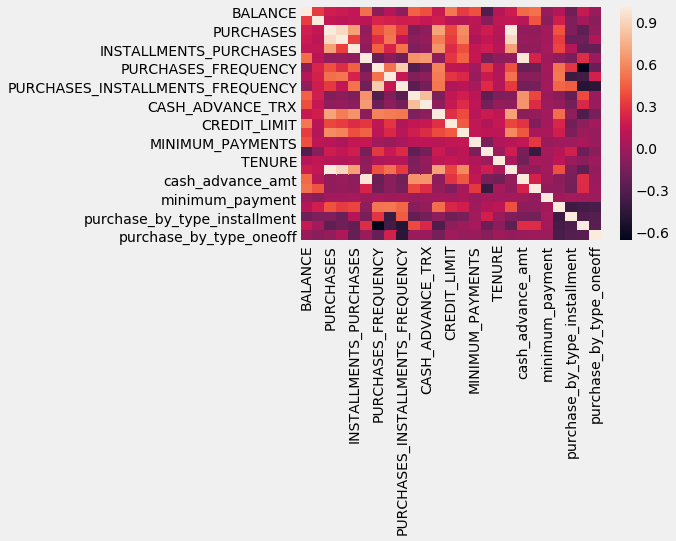

In [216]:
sns.heatmap(credit_df.corr())

### Now as collinearity between variables is too much we will be using PCA to trim down some attributes.

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#Standarize Data
scaler = StandardScaler()
scaler_credit_df = scaler.fit_transform(credit_df)

{4: 0.5849727317771914, 5: 0.6437319294972822, 6: 0.6943230980439953, 7: 0.738249404621573, 8: 0.7779513942846366, 9: 0.8137359151462591, 10: 0.8443400973551507, 11: 0.8731737835116187, 12: 0.8975167234103089, 13: 0.9198375913852371, 14: 0.9369758244889448}


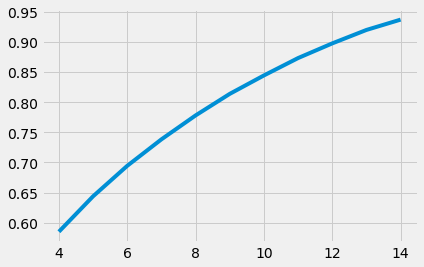

In [218]:
from sklearn.decomposition import PCA
ratio_arr = {}
for i in range(4,15):
    pca=PCA(n_components=i)
    pca_data = pca.fit(scaler_credit_df)
    ratio_arr[i]=sum(pca_data.explained_variance_ratio_)
print(ratio_arr)
pd.Series(ratio_arr).plot()

#### We can see that 9 components are explaining more than 80% variance so we select 9 components.

In [219]:
pc = PCA(n_components=9).fit(scaler_credit_df)
pca_reduced_final = pc.fit_transform(scaler_credit_df)

final_df = pd.DataFrame(pca_reduced_final)
print(final_df.shape)
col_list = credit_df.columns
col_list

#pc.explained_variance_ratio_


(8950, 9)


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'month_avg_purchase', 'cash_advance_amt', 'limit_usage',
       'minimum_payment', 'purchase_by_type_dual',
       'purchase_by_type_installment', 'purchase_by_type_none',
       'purchase_by_type_oneoff'],
      dtype='object')

In [220]:
pd.DataFrame(pc.components_.T,columns=['Component_'+str(i) for i in range(9)],index=col_list)

,Component_0,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8
BALANCE,0.035731,0.350697,-0.093043,0.200744,0.089470,0.217594,0.145309,0.011948,0.186558
BALANCE_FREQUENCY,0.079149,0.138644,-0.153096,0.414343,-0.108177,-0.036811,-0.119753,-0.102732,-0.386042
PURCHASES,0.354392,0.106657,0.156799,-0.065842,0.232453,-0.047570,-0.123566,-0.012151,-0.067518
ONEOFF_PURCHASES,0.298871,0.117494,0.279483,-0.062238,0.169768,-0.033695,-0.149111,-0.018547,-0.111274
INSTALLMENTS_PURCHASES,0.288795,0.036248,-0.142701,-0.041435,0.237810,-0.050451,-0.018313,0.005306,0.044626
CASH_ADVANCE,-0.073900,0.377903,-0.146517,-0.245832,-0.147487,0.081807,0.025918,-0.013958,-0.018962
PURCHASES_FREQUENCY,0.298406,-0.125823,-0.282236,0.049963,-0.256826,0.124108,-0.092949,0.053969,-0.023531
ONEOFF_PURCHASES_FREQUENCY,0.260524,0.043803,0.242693,0.129677,-0.384837,0.012670,-0.030864,0.046814,0.017085
PURCHASES_INSTALLMENTS_FREQUENCY,0.255113,-0.124187,-0.447266,0.012135,-0.068280,-0.000110,-0.025289,0.035584,0.005115
CASH_ADVANCE_FREQUENCY,-0.122336,0.349166,-0.108573,-0.041020,-0.138818,-0.101148,-0.160974,0.026607,-0.144920


#### We will be using Kmeans algo. for clustering and be using Elbow method for verifying number of clusters.

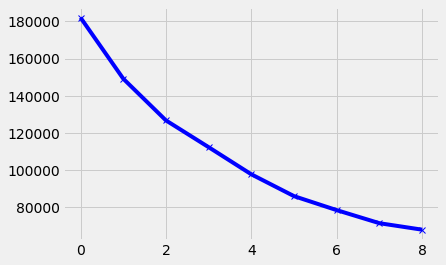

In [221]:
from sklearn.metrics import silhouette_score
n_clusters = 10
cost = []


for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(pca_reduced_final)
    cost.append(kmeans.inertia_)
plt.plot(cost,'bx-')
plt.show()

#### Elbow point is at 5. So cluster choose is 5

In [222]:
score=0
km = KMeans(5)
km.fit(pca_reduced_final)
score=silhouette_score(pca_reduced_final,km.labels_)

In [223]:
score

0.26621899140029964

In [224]:
col_kpi=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'month_avg_purchase', 'cash_advance_amt', 'limit_usage',
       'minimum_payment', 'purchase_by_type_dual',
       'purchase_by_type_installment', 'purchase_by_type_none',
       'purchase_by_type_oneoff']

#### Here we see that number of clusters suggested is 5 . The PCA transformation provides us better results. So we are creating a pipeline with Standard Scaler, PCA and KMeans together.

In [225]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline(
    [("scaler",StandardScaler()),
    ("pca",PCA(n_components=9,random_state=42))
    ]
)

cluster = Pipeline(
    [
        ('km',KMeans(n_clusters=5,init='k-means++',n_init=50,random_state=42))
    ]
)

pipe = Pipeline(
    [
        ("preprocess",preprocess),
        ("cluster",cluster)
    ]
)

pipe.fit(credit_df)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=9, random_state=42))])),
                ('cluster',
                 Pipeline(steps=[('km',
                                  KMeans(n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [226]:
preprocessed_data = pipe['preprocess'].transform(credit_df)
predicted_labels = pipe['cluster']['km'].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.26701661720406406

### N_components=9 and Cluster=5

In [227]:
cluster_df = pd.concat([credit_df[col_kpi],pd.Series(pipe['cluster']['km'].labels_,name="Cluster")],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,month_avg_purchase,cash_advance_amt,limit_usage,minimum_payment,purchase_by_type_dual,purchase_by_type_installment,purchase_by_type_none,purchase_by_type_oneoff,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1,1


In [228]:
five_cluster=cluster_df.groupby('Cluster').apply(lambda x: x[col_kpi].mean()).T
five_cluster

Cluster,0,1,2,3,4
BALANCE,576.248265,1281.463288,4813.533602,1390.254332,4380.106552
BALANCE_FREQUENCY,0.809415,0.835993,0.957784,0.952522,0.982286
PURCHASES,507.030795,259.482284,488.189891,1847.481965,11545.288800
ONEOFF_PURCHASES,0.927325,254.542333,304.969497,1136.798723,7852.579086
INSTALLMENTS_PURCHASES,507.092647,4.985830,183.293643,710.826685,3692.709714
CASH_ADVANCE,180.364878,760.129360,5427.447583,325.698086,817.495908
PURCHASES_FREQUENCY,0.706873,0.122319,0.266736,0.835285,0.932675
ONEOFF_PURCHASES_FREQUENCY,0.000632,0.114936,0.129003,0.478419,0.756736
PURCHASES_INSTALLMENTS_FREQUENCY,0.670429,0.008031,0.171059,0.608063,0.777991
CASH_ADVANCE_FREQUENCY,0.031287,0.155648,0.506741,0.064816,0.081429


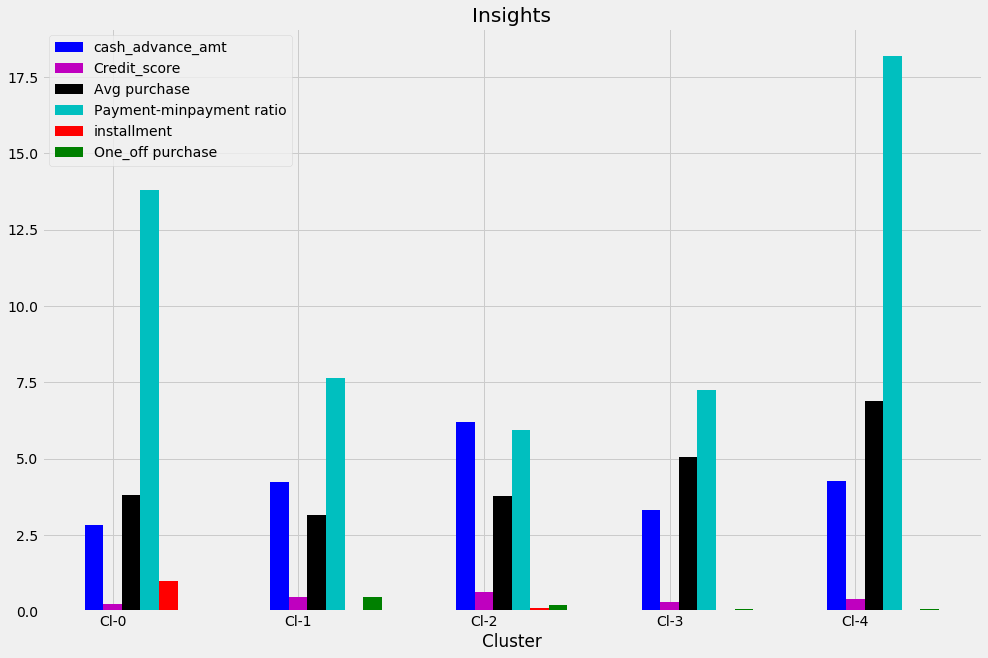

In [229]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(five_cluster.columns))

cash_advance=np.log(five_cluster.loc['cash_advance_amt',:].values)
credit_score=(five_cluster.loc['limit_usage',:].values)
purchase= np.log(five_cluster.loc['month_avg_purchase',:].values)
payment=five_cluster.loc['minimum_payment',:].values
installment=five_cluster.loc['purchase_by_type_installment',:].values
one_off=five_cluster.loc['purchase_by_type_oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='cash_advance_amt',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))

plt.legend()

### Cluster0:
    This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.
### Cluster1:
    This group is a risky group as percent of full payment paid by user is not much.
### Cluster2:
    This group has minimum paying ratio and using card for both transactions.Also, have highest cash advance amount. This group is a risky group.
### Cluster3:
    They are potential customers who are paying dues and doing purchases and maintaining comparatively good credit score.
### Cluster4:
    This group of users have maintained good credit score can be lured by offering more incentives for the installment purchases.